In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("train.csv")
df.shape

(404290, 6)

In [3]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
56758,56758,99860,99861,Do I love her?,Do I love her or not?,1
128592,128592,206767,206768,What is the difference between continuous and ...,What is difference between continuous and disc...,0
234174,234174,344615,344616,Why isn't there military conscription in India?,Why isn't there military conscription in the US?,0
295561,295561,74064,417622,"Was the movie ""Unstoppable"" (2010) based on a ...",Is Rajinikanth's movie Kabali based on a real ...,0
140875,140875,84039,97502,How do i stop being an extrovert?,How do I stop myself from being an introvert?,1
117426,117426,191067,191068,What is your future plan?,What is the best way to plan out your future?,0
236430,236430,347346,347347,What is the estimated middle class population ...,What are the most popular social media sites i...,0
58565,58565,35269,102724,How many keywords are there in the Clojure pro...,How many keywords are there in the Datalog pro...,0
234348,234348,344817,344818,What is the difference between laws and rules?,What's the difference between rules and laws?,1
216017,216017,58832,79388,What if I have viewed someone's video on Insta...,If you view a video on someone's timeline that...,1


In [4]:
df.info()
new_df=df.sample(30000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [6]:
new_df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot:>

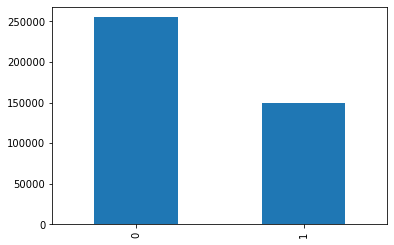

In [7]:
#Distribution of duplicate and non-duplicate questions
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Number of Unique questions',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of Unique questions 537933
Number of questions getting repeated 111780


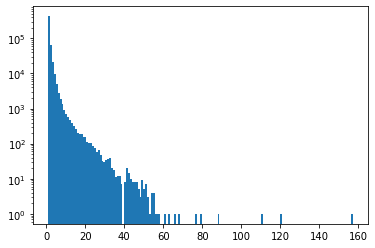

In [9]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [10]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
1014,Is scientology a fraud?,Is Scientology bullshit?
108516,How do I transfer WhatsApp messages from Andro...,Is there a way to reliably transfer my WhatsAp...
306905,Will 8 GB RAM on MacBook pro work if I easily ...,Can hot air emitted from 100 ACs of 2 tons gen...
106935,What is an Administrator?,What is an administration?
56135,Some useful life hacks?,"Which ""digital and logic design(DLD)"" project ..."


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
#merge text
questions=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [12]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [13]:
temp_df['is_duplicate']=new_df['is_duplicate']

In [14]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
1014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
108516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
306905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,test_size=0.2,random_state=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,1:].values,temp_df.iloc[:,0].values,test_size=0.2,random_state=1)


In [19]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrices import accuracy_score
#rf=RandomForestClassifier()
#rf.fit(X_train,y_train)
#y_pred=rf.predict(X_test)
#accuracy_score(y_test,y_pred)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9985